In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [9]:
iris_data=pd.read_csv("C:/Users/saurav/Desktop/code_stack_python/Iris Project/Iris.csv")
iris_data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
##Designing the test set and train set

In [70]:
X = np.array(iris_data.ix[:, 0:4])
y = np.array(iris_data['Species'])
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=3)

In [98]:
# Working for a given value of K ----> number neighbours
model = KNeighborsClassifier(n_neighbors=4)
# fitting the model
model.fit(X_train, y_train)
pred= model.predict(X_test)
print(accuracy_score(y_test,pred))
#############################################################################
#model.predict([2,3,3,4])----> Will rectify the error

0.966666666667


In [83]:
neighRange = range(1,60)
# We can create Python dictionary using [] or dict()
scores = []
for k in neighRange:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, pred))

print(scores)

[0.97777777777777775, 0.9555555555555556, 0.98888888888888893, 0.96666666666666667, 0.98888888888888893, 0.96666666666666667, 0.97777777777777775, 0.96666666666666667, 1.0, 1.0, 0.97777777777777775, 0.97777777777777775, 1.0, 0.98888888888888893, 1.0, 0.98888888888888893, 1.0, 0.98888888888888893, 0.97777777777777775, 0.97777777777777775, 1.0, 0.97777777777777775, 0.96666666666666667, 0.96666666666666667, 0.97777777777777775, 0.97777777777777775, 0.97777777777777775, 0.94444444444444442, 0.94444444444444442, 0.93333333333333335, 0.91111111111111109, 0.92222222222222228, 0.92222222222222228, 0.94444444444444442, 0.94444444444444442, 0.94444444444444442, 0.59999999999999998, 0.59999999999999998, 0.61111111111111116, 0.31111111111111112, 0.31111111111111112, 0.31111111111111112, 0.31111111111111112, 0.31111111111111112, 0.31111111111111112, 0.31111111111111112, 0.31111111111111112, 0.31111111111111112, 0.31111111111111112, 0.31111111111111112, 0.31111111111111112, 0.31111111111111112, 0.31

In [84]:
#Recording the missclassification errors
missClass = [1 - x for x in scores]

# determining best k
optimal_k = neighRange[missClass.index(min(missClass))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 9


Text(0,0.5,'Testing Accuracy')

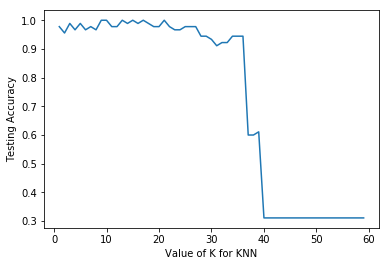

In [85]:
plt.plot(neighRange, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')